In [1]:
#%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import texttable
import gc
import timeit
import sys
import os

# Loading reported and synthetic data

In [3]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [4]:
# Revoking top hits frames created by the seen deer estimator
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(save_dir + "top_hits_Averoy_seen_deer.pkl")
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(save_dir + "top_hits_Sunndal_seen_deer.pkl")
top_hits_Vestnes_seen_deer = pd.read_pickle(save_dir + "top_hits_Vestnes_seen_deer.pkl")
top_hits_Laerdal_seen_deer = pd.read_pickle(save_dir + "top_hits_Laerdal_seen_deer.pkl")


In [5]:
# Data needed for plotting the figures below
compare = "before_hunt"
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]

afont = {"fontname": "Arial"}

## Correlation matrices between all winter survival parameters and fertility parameters for all municipalities boxplotted over all 15 years

In [6]:
def plot_parameter_correlation(location):
    df_original = [
            "df_original_sorted_Averoy.pkl",
            "df_original_sorted_Tingvoll.pkl",
            "df_original_sorted_Surnadal.pkl",
            "df_original_sorted_Sunndal.pkl",
            "df_original_sorted_Vestnes.pkl",
            "df_original_sorted_Laerdal.pkl",
        ]
    
    save_dir = "synthetic_data/"
    if location == "Averoy":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Averoy.pkl")
        hits = top_hits_Averoy_seen_deer    
    if location == "Tingvoll":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Tingvoll.pkl")
        hits = top_hits_Tingvoll_seen_deer     
    if location == "Surnadal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Surnadal.pkl")
        hits = top_hits_Surnadal_seen_deer
    if location == "Sunndal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Sunndal.pkl")
        hits = top_hits_Sunndal_seen_deer
    if location == "Vestnes":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Vestnes.pkl")
        hits = top_hits_Vestnes_seen_deer
    if location == "Laerdal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Laerdal.pkl")
        hits = top_hits_Laerdal_seen_deer

    parameters = np.zeros((len(top_hits_Averoy_seen_deer),15,8))
    for i in range(len(hits)):
        # Read parameters data needed for finding records in the original data frame
        identificator = hits.iloc[i, 0:9]

        # Read all 15 records associated with the 9 first parameters above in
        # the sorted original frame
        df_hits = df_municipality.loc[
            (df_municipality["init_pop"] == identificator[0])
            & (df_municipality["init_hps"] == identificator[1])
            & (df_municipality["sh_threshold"] == identificator[2])
            & (df_municipality["i_fcalves"] == identificator[3])
            & (df_municipality["i_yhinds"] == identificator[4])
            & (df_municipality["i_ahinds"] == identificator[5])
            & (df_municipality["i_mcalves"] == identificator[6])
            & (df_municipality["i_ystags"] == identificator[7])
            & (df_municipality["i_astags"] == identificator[8])
        ].copy()

        # Extract all 8 targeted parameters associated with the top hit
        parameters[i,:,:] = df_hits.iloc[:,23:31].values 

    
    # Find all correlation matrices across all 15 years
    corr_coeff_all = np.zeros((parameters.shape[1],8,8))
    for i in range(parameters.shape[1]):
        corr_coeff_all[i,:,:] = np.corrcoef(parameters[:,i,:], rowvar=False)
    
    fig, ax = plt.subplots(ncols=8, nrows=8, figsize=(12, 12))
    title = ["f_c", "y_h", "a_h", "m_c", "y_s", "a_s", "y_h_f", "a_h_f"]
    for i in range(8):
        for j in range(8):
            ax[i,j].boxplot(corr_coeff_all[:,i,j])
            ax[i,j].set_xticks([])
            if i == 0:
                ax[i,j].set_title(title[j],fontsize=14)
            if j == 0:
                ax[i,j].set_ylabel(title[i], fontsize=14) #,rotation=0)
            if i == j:
                ax[i,j].set_yticks([1])
            if (i == 0) & (j == 0):
                ax[i,j].set_ylabel(title[i], fontsize=14, labelpad=25)

    fig.tight_layout()
    fig.suptitle('Correlations between winter survival and fertility parameters for ' + location + ' municipality', y=1.02, fontsize=18, **afont)
    return

CPU times: user 9min 10s, sys: 9min 29s, total: 18min 40s
Wall time: 23min 36s


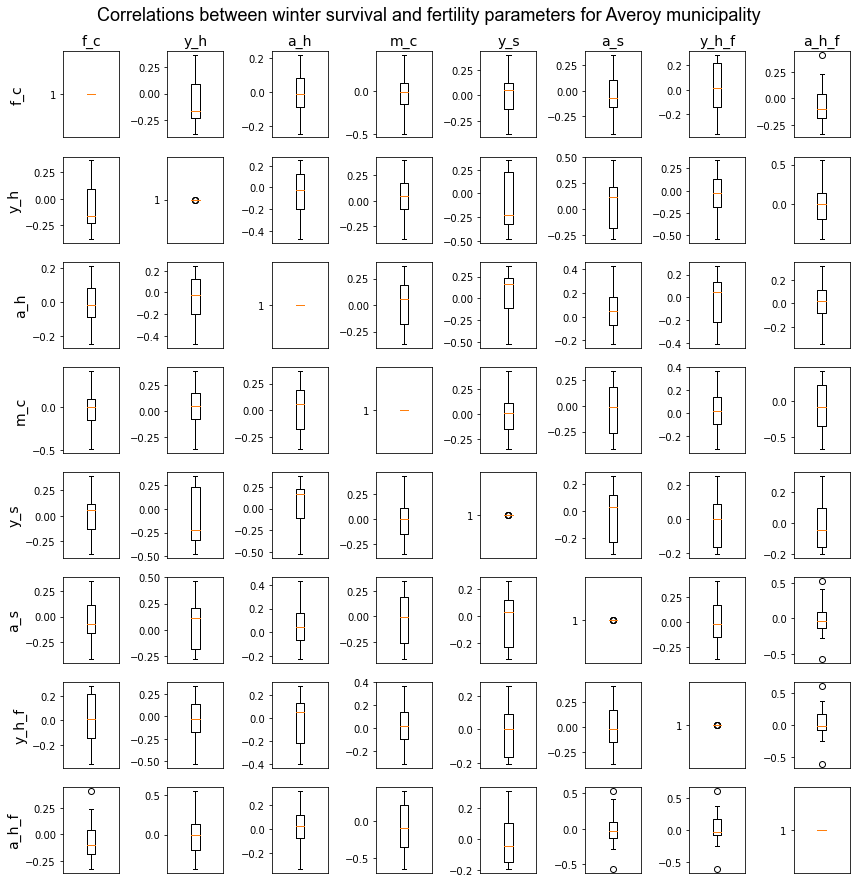

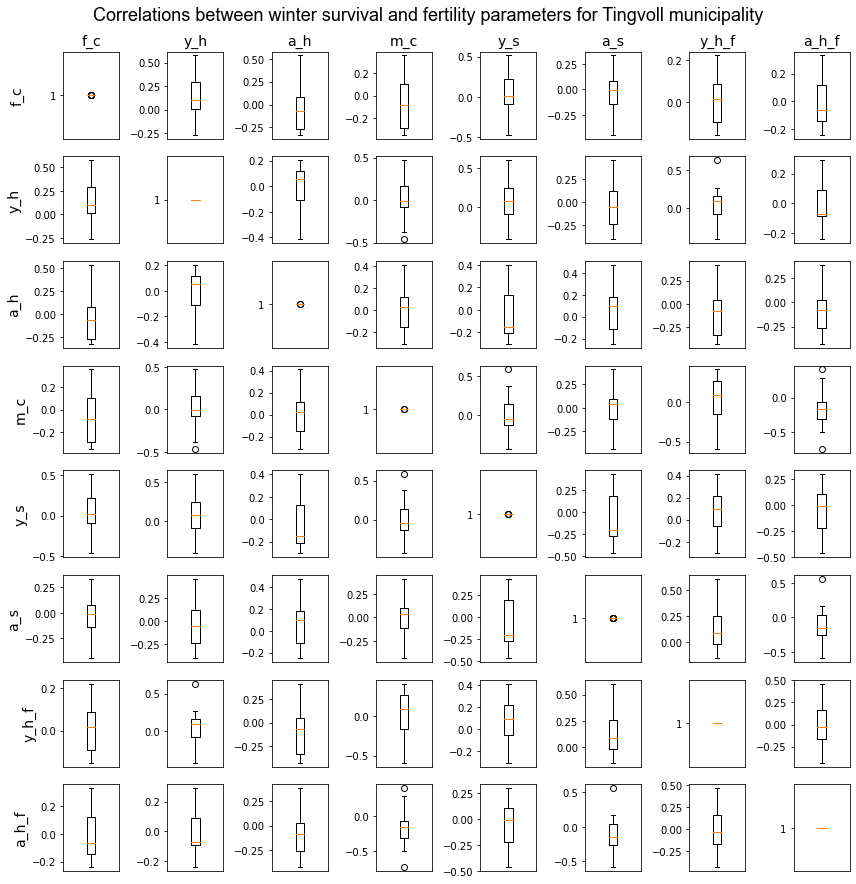

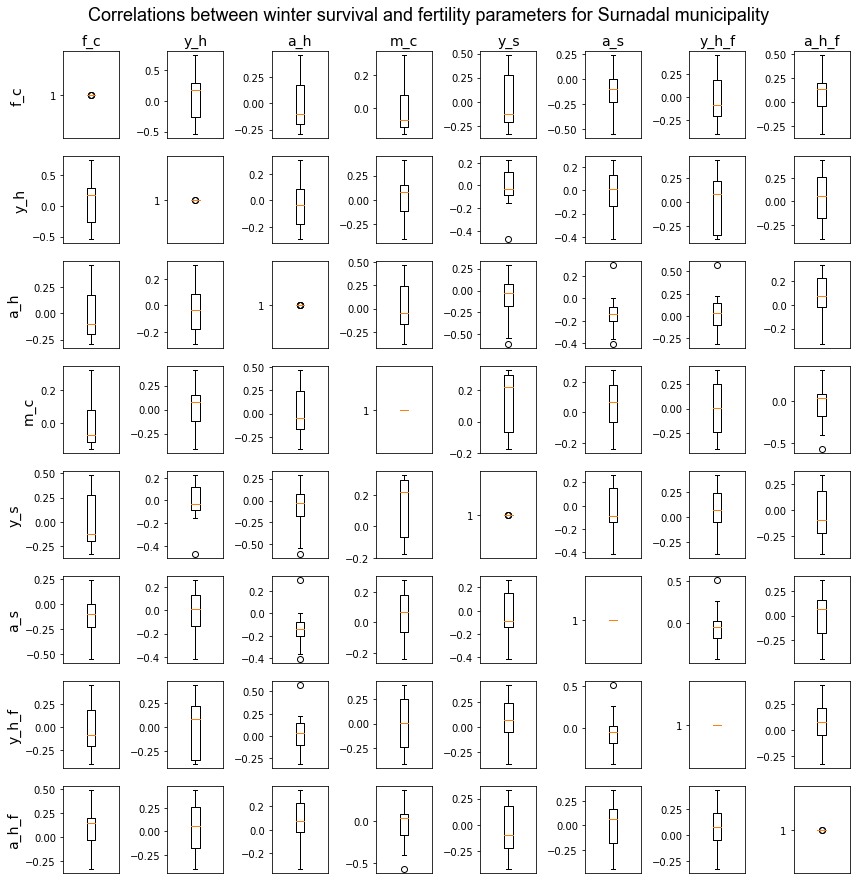

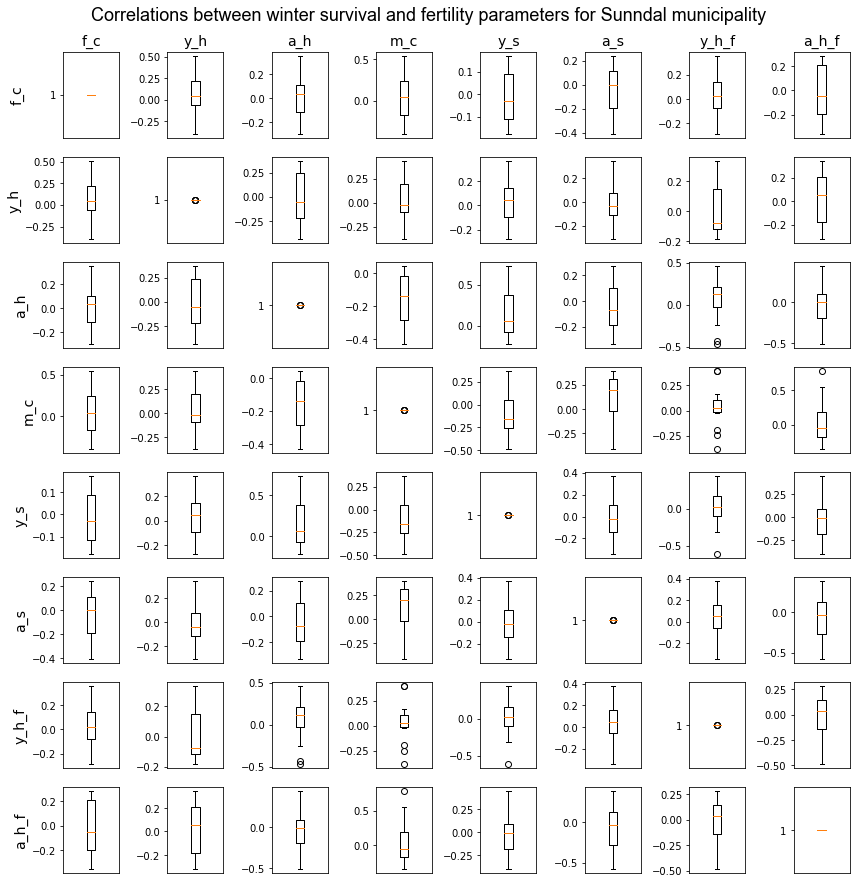

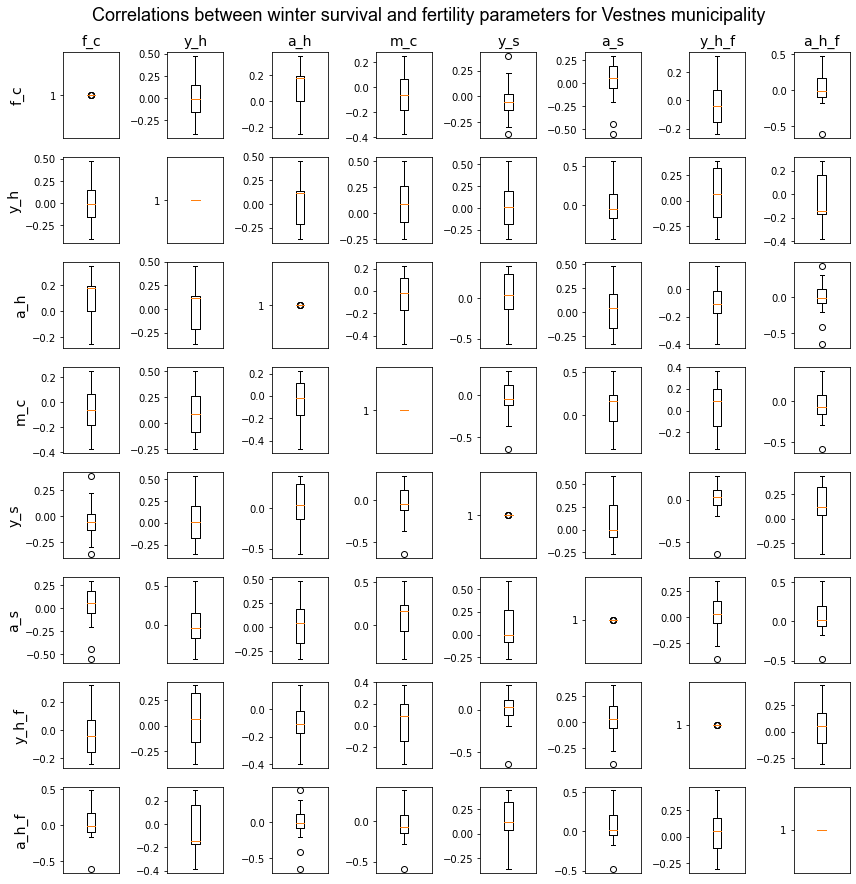

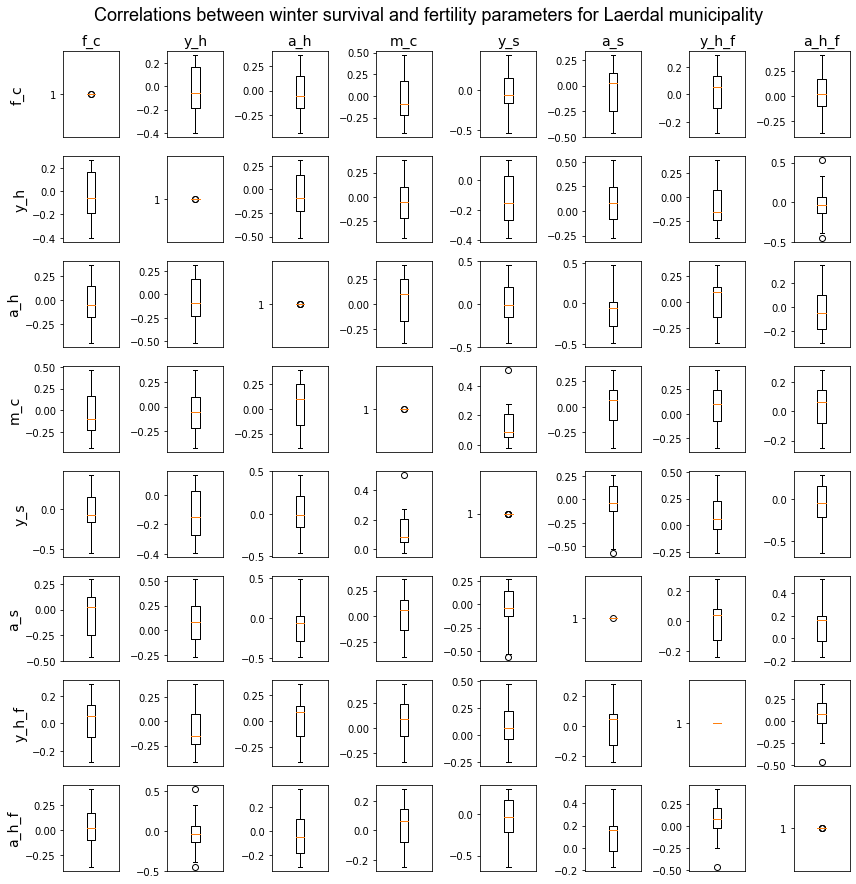

In [7]:
%%time
# Run the show
for municipality in municipalities:
    plot_parameter_correlation(municipality)

# Check correlation matrix plot against a random situation

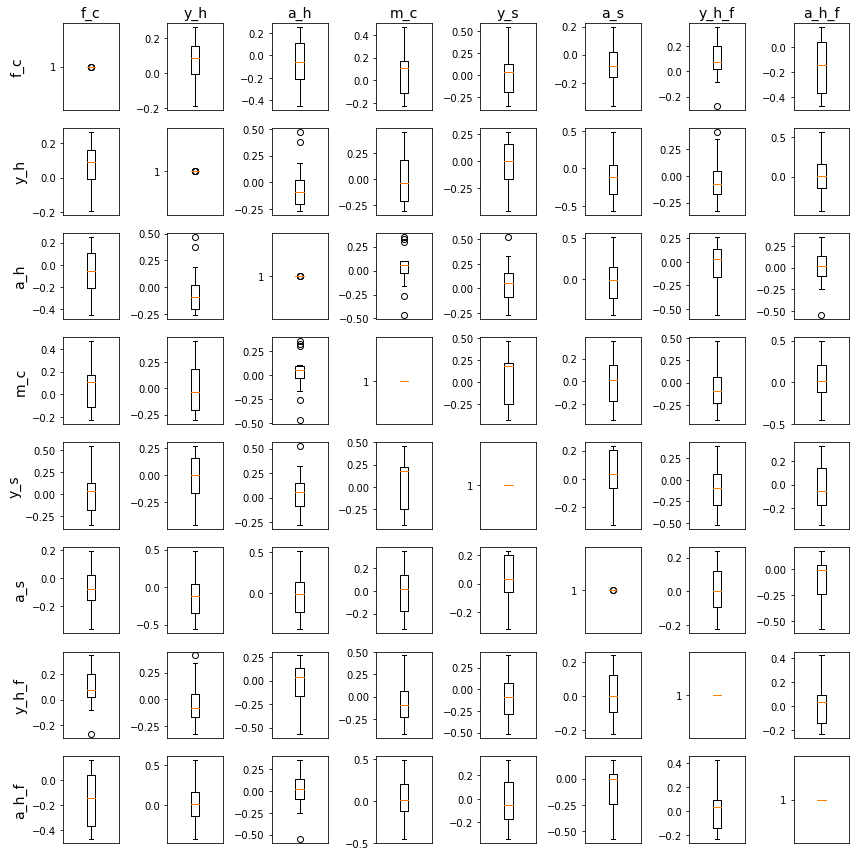

In [8]:
fig, ax = plt.subplots(ncols=8, nrows=8, figsize=(12, 12))
title = ["f_c", "y_h", "a_h", "m_c", "y_s", "a_s", "y_h_f", "a_h_f"]

para = np.zeros((20,15,8))
for i in range(20):
    for j in range(15):
        para[i,j,0] =  np.random.default_rng().normal(0.8, 0.04)
        if para[i,j,0] >= 1.0:
            para[i,j,0] = 1.0
        
        para[i,j,1] =  np.random.default_rng().normal(0.92, 0.03)
        if para[i,j,1] >= 1.0:
            para[i,j,1] = 1.0
        
        para[i,j,2] =  np.random.default_rng().normal(0.93, 0.03)
        if para[i,j,2] >= 1.0:
            para[i,j,2] = 1.0
        
        para[i,j,3] =  np.random.default_rng().normal(0.8, 0.04)
        if para[i,j,3] >= 1.0:
            para[i,j,3] = 1.0
        
        para[i,j,4] =  np.random.default_rng().normal(0.87, 0.04)
        if para[i,j,4] >= 1.0:
            para[i,j,4] = 1.0
        
        para[i,j,5] =  np.random.default_rng().normal(0.93, 0.03)
        if para[i,j,5] >= 1.0:
            para[i,j,5] = 1.0
        
        para[i,j,6] =  np.random.default_rng().normal(0.4, 0.05)
        if para[i,j,6] >= 1.0:
            para[i,j,6] = 1.0
        
        para[i,j,7] =  np.random.default_rng().normal(0.975, 0.008)
        if para[i,j,7] >= 1.0:
            para[i,j,7] = 1.0

corr_coeff_all = np.zeros((para.shape[1],8,8))
for i in range(para.shape[1]):
    corr_coeff_all[i,:,:] = np.corrcoef(para[:,i,:], rowvar=False)

for i in range(8):
    for j in range(8):
        ax[i,j].boxplot(corr_coeff_all[:,i,j])
        ax[i,j].set_xticks([])
        #ax[i,j].margins(x=0.01)
        if i == 0:
            ax[i,j].set_title(title[j],fontsize=14)
        if j == 0:
            ax[i,j].set_ylabel(title[i], fontsize=14) #,rotation=0)
        if i == j:
            #ax[i,j].set(ylabel=None)
            ax[i,j].set_yticks([1.0])
        if (i == 0) & (j == 0):
            ax[i,j].set_ylabel(title[i], fontsize=14, labelpad=25)

fig.tight_layout()
pass;